In [19]:
# Copyright 2025 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

## Automating Tabular Data Extraction from Scanned Images

| | |
|-|-|
| Author(s) | [Laxmi Harikumar](https://github.com/laxmi-genai) |

## Overview
[Gemini 2.0 Pro](https://cloud.google.com/vertex-ai/generative-ai/docs/gemini-v2#2.0-pro) is Google's strongest model for coding and world knowledge and features a 2M long context window. Gemini 2.0 Pro is available as an experimental model in Vertex AI and is an upgrade path for 1.5 Pro users who want better quality, or who are particularly invested in long context and code.

## Objective

Data extraction from tables (either from Native PDFs or image files) has multiple challenges. Accurate extraction of specific columns from complex tables containing multi-line text is particularly challenging

This notebook explores data extraction using Gemini 2.0 Pro model

## Getting Started

### Install Google Gen AI SDK for Python

In [20]:
!pip install --upgrade --quiet google-genai

### Restart runtime
To use the newly installed packages in this Jupyter runtime, you must restart the runtime. You can do this by running the cell below, which restarts the current kernel.

The restart might take a minute or longer. After it's restarted, continue to the next step.

In [ ]:
import IPython

app = IPython.Application.instance()
app.kernel.do_shutdown(True)

<div class="alert alert-block alert-warning">
<b>⚠️ The kernel is going to restart. Wait until it's finished before continuing to the next step. ⚠️</b>
</div>

### Authenticate your notebook environment (Colab only)
If you are running this notebook on Google Colab, run the cell below to authenticate your environment.

In [21]:
import sys

if "google.colab" in sys.modules:
    from google.colab import auth

    auth.authenticate_user()

### Import libraries

In [22]:
from google import genai

import os

from IPython.display import  Markdown, display

# import numpy as np
from google.genai.types import GenerateContentConfig, Part

### Set Google Cloud project information and create client

To get started using Vertex AI, you must have an existing Google Cloud project and [enable the Vertex AI API](https://console.cloud.google.com/flows/enableapi?apiid=aiplatform.googleapis.com).

Learn more about [setting up a project and a development environment](https://cloud.google.com/vertex-ai/docs/start/cloud-environment).

In [23]:
PROJECT_ID = ""  # @param {type: "string", placeholder: "[your-project-id]", isTemplate: true}
if not PROJECT_ID or PROJECT_ID == "[your-project-id]":
    PROJECT_ID = str(os.environ.get("GOOGLE_CLOUD_PROJECT"))

LOCATION = os.environ.get("GOOGLE_CLOUD_REGION", "us-central1")

In [24]:
client = genai.Client(vertexai=True, project=PROJECT_ID, location=LOCATION)

## Use the Gemini 2.0 Pro model

In [25]:
MODEL_ID = "gemini-2.0-pro-exp-02-05"   # @param {type: "string"}

## Configure model parameters

You can include parameter values in each call that you send to a model to control how the model generates a response. The model can generate different results for different parameter values. You can experiment with different model parameters to see how the results change.

- Learn more about [experimenting with parameter values](https://cloud.google.com/vertex-ai/generative-ai/docs/learn/prompts/adjust-parameter-values).

- See a list of all [Gemini API parameters](https://cloud.google.com/vertex-ai/generative-ai/docs/model-reference/inference#parameters)

In [26]:
config=GenerateContentConfig(
        temperature=0.3,
        top_p=0.95,
        top_k=20,
    ),

## Load the sample table image

Image is a screenshot from https://www.learncbse.in/ncert-solutions-for-class-12-accountancy-part-ii-chapter-6-cash-flow-statement/

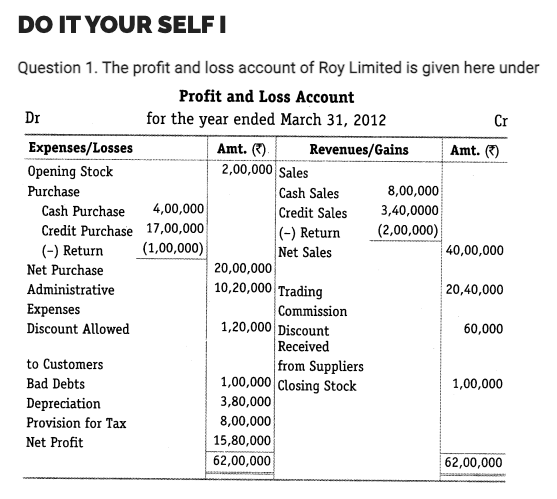

## Extract data points from the image


In [27]:
image_url = "gs://ai_camp_demo_artefacts/profit_loss.png"

image_details = Part.from_uri(
    file_uri=image_url,
    mime_type="image/png",
)

prompt = "Extract the amounts of cash purchase, cash sales, Net Profit and Discount Receivers from Suppliers and provide the response as a table"  # @param ["Detect all rainbow socks", "Find all socks and label them with emojis ", "Show me the positions of the socks with the face","Find the sock that goes with the one at the top"] {"allow-input":true}

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        prompt,
        image_details
    ],
)

display(Markdown(response.text))

Okay, here's the table extracting the requested information from the Profit and Loss Account image:

| Item                             | Amount (₹) |
| -------------------------------- | ------------- |
| Cash Purchase                    | 4,00,000      |
| Cash Sales                       | 8,00,000      |
| Net Profit                       | 15,80,000     |
| Discount Received from Suppliers | 60,000       |


## Can Gemini validate the calculations?

In [ ]:
image_url = "gs://ai_camp_demo_artefacts/profit_loss.png"

image_details = Part.from_uri(
    file_uri=image_url,
    mime_type="image/png",
)

prompt = "Validate if the Net sales and Net Purchase amounts are being calculated correctly"  # @param ["Detect all rainbow socks", "Find all socks and label them with emojis ", "Show me the positions of the socks with the face","Find the sock that goes with the one at the top"] {"allow-input":true}

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        prompt,
        image_details
    ],
)

print(response.text)

Okay, let's validate the Net Sales and Net Purchase calculations in the provided Profit and Loss Account image.

**1. Net Purchases:**

*   **Calculation:**
    *   Cash Purchase: 4,00,000
    *   Credit Purchase: 17,00,000
    *   Total Purchases: 4,00,000 + 17,00,000 = 21,00,000
    *   Returns: (1,00,000)
    *   Net Purchases: 21,00,000 - 1,00,000 = 20,00,000

*   **Validation:** The Net Purchase amount of 20,00,000 is calculated **correctly**.

**2. Net Sales:**

*    **Calculation:**
    *   Cash Sales: 8,00,000
    *    Credit Sales: 34,00,000
    *    Total Sales = 8,00,000 + 34,00,000 = 42,00,000
    *   Returns: (2,00,000)
    *   Net Sales: 42,00,000-2,00,000 =40,00,000

*   **Validation:** The Net Sales amount of 40,00,000 is calculated **correctly**.

**Conclusion:**

Both the Net Sales and Net Purchase amounts are calculated correctly according to standard accounting principles (Total Sales/Purchases minus Returns).

